In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# EDA

In [2]:
data = pd.read_excel('Base de datos v1.xlsx')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID_Cliente               20000 non-null  int64  
 1   Edad                     19700 non-null  float64
 2   Genero                   20000 non-null  object 
 3   Estado_Civil             20000 non-null  object 
 4   Ingreso_Mensual          19500 non-null  float64
 5   Transacciones_Mensuales  20000 non-null  int64  
 6   Monto_Promedio_Compra    19800 non-null  float64
 7   Uso_Linea_Credito_Pct    20000 non-null  float64
 8   Pagos_Atrasados          20000 non-null  int64  
 9   Antiguedad_Meses         20000 non-null  int64  
 10  Productos_Adicionales    20000 non-null  int64  
 11  Fuga                     20000 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 1.8+ MB


In [4]:
data.describe()

,ID_Cliente,Edad,Ingreso_Mensual,Transacciones_Mensuales,Monto_Promedio_Compra,Uso_Linea_Credito_Pct,Pagos_Atrasados,Antiguedad_Meses,Productos_Adicionales,Fuga
count,20000.000000,19700.000000,19500.000000,20000.000000,19800.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000
mean,10000.500000,40.187360,4006.623795,31.496050,519.013752,0.285052,0.802350,35.80920,1.088500,0.185350
std,5773.647028,11.628559,2848.305669,31.443938,413.345305,0.159271,0.894217,35.80716,1.204259,0.388591
min,1.000000,18.000000,200.000000,12.000000,23.540000,0.000000,0.000000,1.00000,0.000000,0.000000
25%,5000.750000,32.000000,1916.000000,26.000000,252.875000,0.160000,0.000000,10.00000,0.000000,0.000000
50%,10000.500000,40.000000,3351.000000,30.000000,406.355000,0.260000,1.000000,25.00000,1.000000,0.000000
75%,15000.250000,48.000000,5373.000000,34.000000,647.460000,0.390000,1.000000,50.00000,2.000000,0.000000
max,20000.000000,75.000000,28733.000000,967.000000,6635.400000,0.900000,6.000000,240.00000,8.000000,1.000000


In [5]:
data.isnull().sum()/len(data)*100

ID_Cliente                 0.0
Edad                       1.5
Genero                     0.0
Estado_Civil               0.0
Ingreso_Mensual            2.5
Transacciones_Mensuales    0.0
Monto_Promedio_Compra      1.0
Uso_Linea_Credito_Pct      0.0
Pagos_Atrasados            0.0
Antiguedad_Meses           0.0
Productos_Adicionales      0.0
Fuga                       0.0
dtype: float64

## Imputación nulos

In [6]:
data.dropna(subset=['Edad', 'Ingreso_Mensual', 'Monto_Promedio_Compra'], inplace=True)

In [7]:
data.isnull().sum()/len(data)*100

ID_Cliente                 0.0
Edad                       0.0
Genero                     0.0
Estado_Civil               0.0
Ingreso_Mensual            0.0
Transacciones_Mensuales    0.0
Monto_Promedio_Compra      0.0
Uso_Linea_Credito_Pct      0.0
Pagos_Atrasados            0.0
Antiguedad_Meses           0.0
Productos_Adicionales      0.0
Fuga                       0.0
dtype: float64

## Análisis Univariado

### Variables cuanti

In [8]:
numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns

In [9]:
numeric_cols = numeric_cols.drop(['ID_Cliente','Fuga'])

In [10]:
from scipy.stats import skew, kurtosis, shapiro

def plot_numeric_distributions(data, numeric_cols):
    cols_per_row = 2
    n = len(numeric_cols)
    rows = -(-n // cols_per_row)

    plt.figure(figsize=(cols_per_row * 7, rows * 4))

    for idx, col in enumerate(numeric_cols, 1):
        sk = skew(data[col].dropna())
        kt = kurtosis(data[col].dropna())
        _, p = shapiro(data[col].dropna())

        plt.subplot(rows, cols_per_row*2, idx*2-1)
        sns.histplot(data[col], kde=True, bins=20, color="skyblue")
        plt.title(f"{col}\nSkew: {sk:.2f}, Kurt: {kt:.2f}, p={p:.2g}")

        plt.subplot(rows, cols_per_row*2, idx*2)
        sns.boxplot(y=data[col], color="lightcoral", showmeans=True)
        plt.title(f"{col} - Boxplot")

    plt.tight_layout()
    plt.show()

/Users/kanyewest/Documents/DataMiningTools/data-mining-tools-activities/venv/lib/python3.11/site-packages/scipy/stats/_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 19015.
  res = hypotest_fun_out(*samples, **kwds)
/Users/kanyewest/Documents/DataMiningTools/data-mining-tools-activities/venv/lib/python3.11/site-packages/scipy/stats/_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 19015.
  res = hypotest_fun_out(*samples, **kwds)
/Users/kanyewest/Documents/DataMiningTools/data-mining-tools-activities/venv/lib/python3.11/site-packages/scipy/stats/_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 19015.
  res = hypotest_fun_out(*samples, **kwds)
/Users/kanyewest/Documents/DataMiningTools/data-mining-tools-activities/venv/lib/python3.11/site-packages/scipy/stats/_axis_

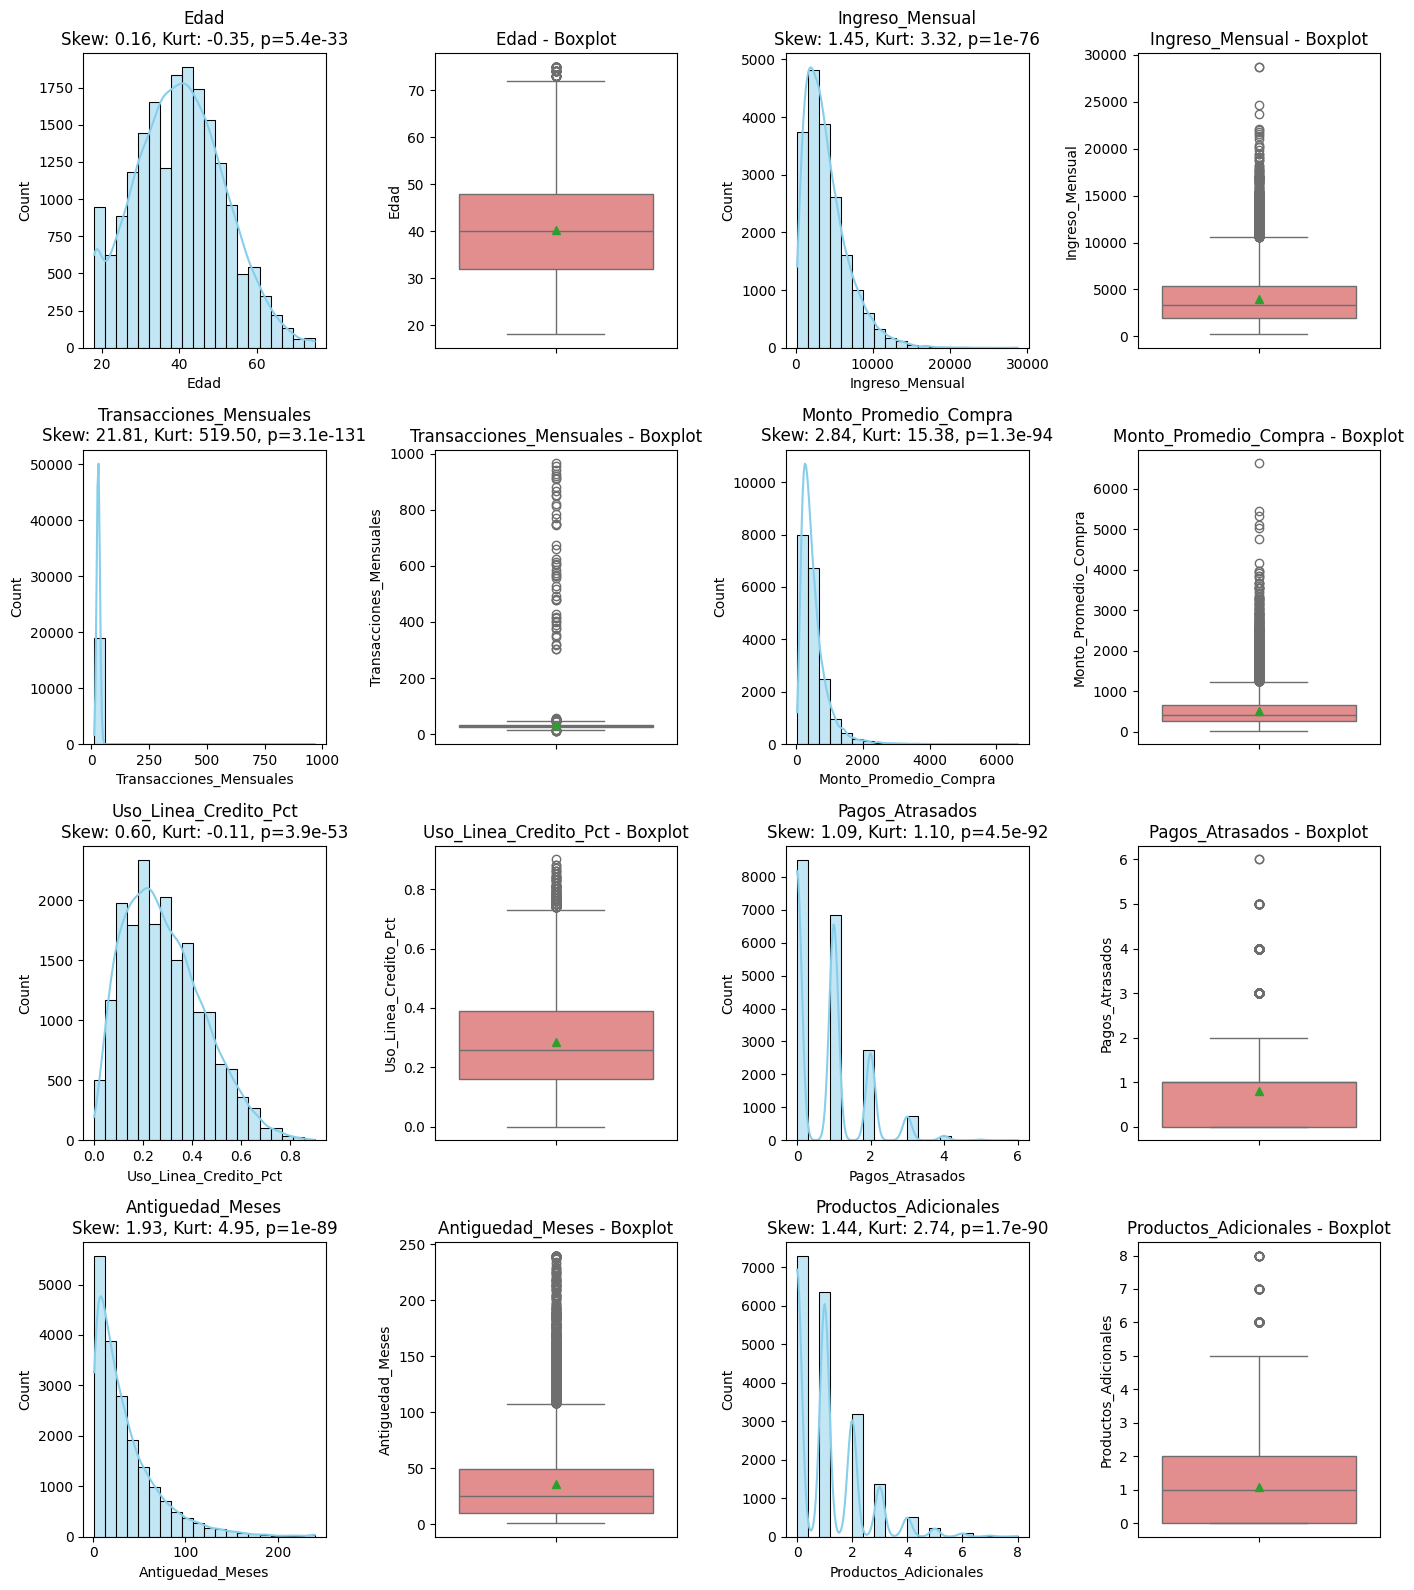

In [11]:
plot_numeric_distributions(data, numeric_cols)

Edad: distribución casi normal, sin valores extremos. La mayoría de clientes está entre 25 y 45 años.

Ingreso mensual: muy asimétrica a la derecha; pocos clientes con ingresos altos y muchos con ingresos bajos o medios.

Transacciones mensuales: extremadamente sesgada; la mayoría realiza pocas transacciones, con algunos casos atípicos muy altos.

Monto promedio de compra: también sesgada positivamente; muchos clientes compran por montos pequeños, pocos con montos muy grandes.

Uso de línea de crédito (%): ligera asimetría a la derecha; la mayoría utiliza menos del 50% de su línea.

Pagos atrasados: la mayoría tiene entre 0 y 1 atraso; pocos clientes con más atrasos (outliers).

Antigüedad (meses): la mayoría de clientes es reciente; pocos con larga antigüedad.

Productos adicionales: distribución discreta; la mayoría tiene 1 o ningún producto adicional.



## Variables cuali

In [12]:
categorical_cols = [col for col in data.select_dtypes(include=['object', 'category']).columns if col != 'Fuga']
categorical_cols.append('Pagos_Atrasados')
categorical_cols.append('Productos_Adicionales')

In [13]:
def plot_categorical_distributions(data, categorical_cols):
    cols_per_row = 3
    n = len(categorical_cols)
    rows = -(-n // cols_per_row)

    plt.figure(figsize=(cols_per_row * 6, rows * 4))

    for idx, col in enumerate(categorical_cols, 1):
        plt.subplot(rows, cols_per_row, idx)
        sns.countplot(data=data, x=col, hue=col, palette="Set2")
        plt.title(f"{col} Distribution")
        plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()

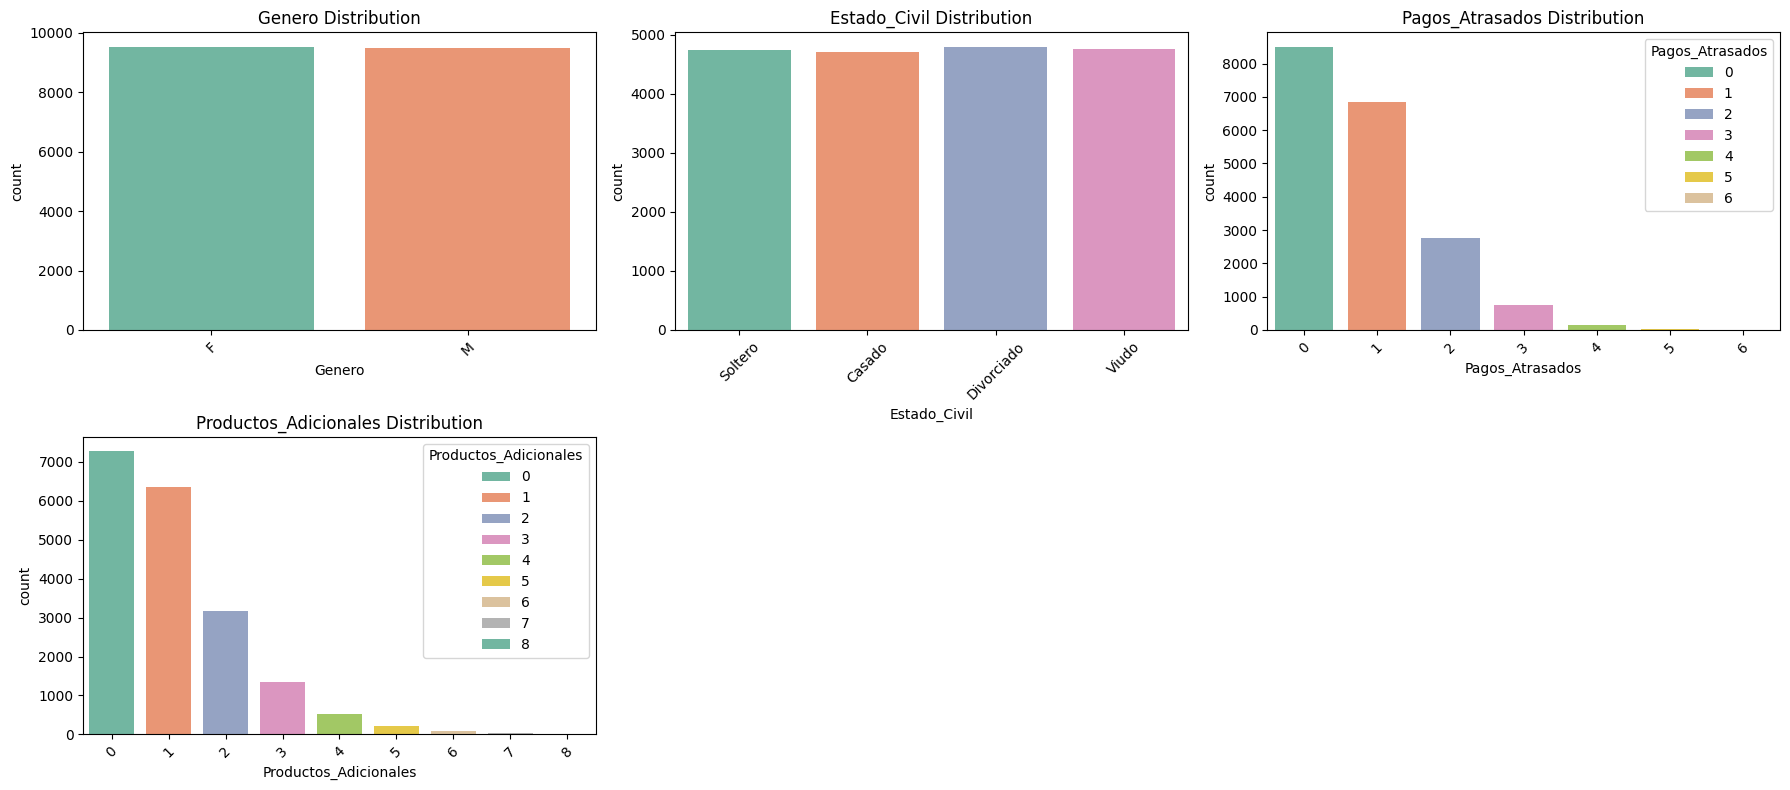

In [14]:
plot_categorical_distributions(data, categorical_cols)

Género: No hay sesgo por género; ambos grupos están representados de forma casi igual.

Estado_civil: No hay una categoría dominante; el estado civil no parece concentrarse en un solo grupo.

Pagos_Atrasados: Indica un buen comportamiento de pago en general; los atrasos múltiples son poco frecuentes.

Productos_Adicionales: Sugiere baja adopción de productos adicionales; posible área de oportunidad comercial.


## Distribución de variable objetivo

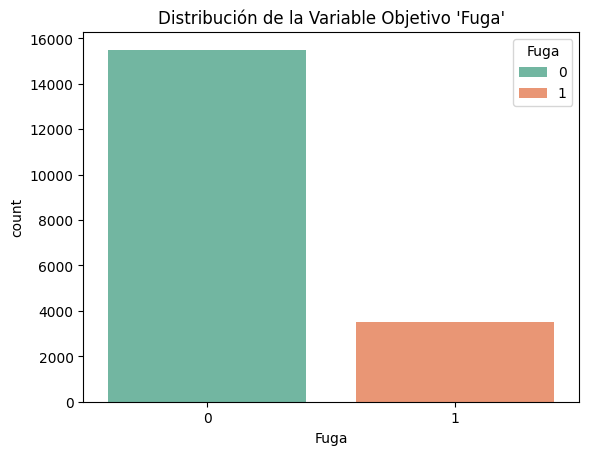

In [15]:
sns.countplot(data=data, x='Fuga', hue='Fuga', palette="Set2")
plt.title("Distribución de la Variable Objetivo 'Fuga'")
plt.show()


Fuga (variable objetivo): El dataset está desbalanceado, lo cual puede requerir técnicas de balanceo para modelos predictivos.


# Análisis Multivariado

## Multivariado Cuantitativa vs Cuantiativa

In [16]:
numeric_cols = numeric_cols.drop(['Pagos_Atrasados', 'Productos_Adicionales'])

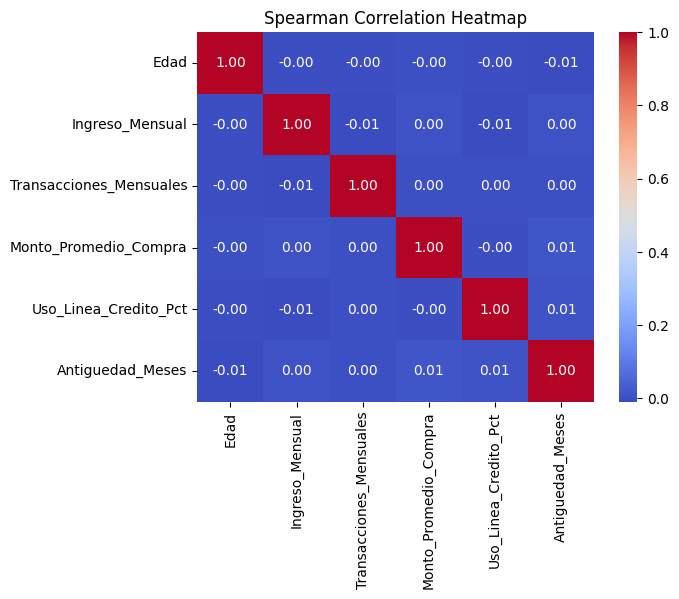

In [17]:
sns.heatmap(data[numeric_cols].corr('spearman'), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Spearman Correlation Heatmap")
plt.show()

No existen correlaciones significativas entre las variables numéricas; todos los coeficientes están muy cercanos a 0.

Esto indica que las variables son independientes entre sí, sin relaciones lineales ni monótonas fuertes.

Osea, no hay multicolinealidad en el dataset, lo cual es positivo para hacer un modelado predictivo.

Cada variable podría aportar información distinta en el análisis de la fuga, sin redundancia entre ellas.

In [18]:
from scipy.stats import spearmanr
import numpy as np

def get_spearman_pvalues(df):
    """Calcula matriz de p-valores para correlaciones de Spearman
        args: df (DataFrame): DataFrame con variables numéricas
        return: DataFrame con matriz de p-valores
    """
    cols = df.columns
    n = len(cols)
    p_matrix = np.zeros((n, n))

    for i in range(n):
        for j in range(n):
            if i == j:
                p_matrix[i, j] = 0  # Diagonal siempre 0
            else:
                # Eliminar NaN para el cálculo
                x = df.iloc[:, i].dropna()
                y = df.iloc[:, j].dropna()
                # Encontrar índices comunes (sin NaN en ambas variables)
                common_idx = df[[cols[i], cols[j]]].dropna().index
                if len(common_idx) > 2:
                    corr, p_val = spearmanr(df.loc[common_idx, cols[i]],
                                          df.loc[common_idx, cols[j]])
                    p_matrix[i, j] = p_val
                else:
                    p_matrix[i, j] = np.nan

    return pd.DataFrame(p_matrix, index=cols, columns=cols)

# Calcular matriz de p-valores
p_values_spearman = get_spearman_pvalues(data[numeric_cols])


def correlation_df(df, pval_matrix, method='spearman'):
    # Crear lista de pares únicos (sin repetir)
    corr_matrix = df.corr(method=method)
    pairs_data = []
    cols = df.columns
    for i in range(len(cols)):
        for j in range(i+1, len(cols)):
            var1, var2 = cols[i], cols[j]
            corr = corr_matrix.loc[var1, var2]
            p_val = pval_matrix.loc[var1, var2]

            # Clasificar fuerza de correlación
            abs_corr = abs(corr)
            if abs_corr < 0.1:
                fuerza = "Muy débil"
            elif abs_corr < 0.3:
                fuerza = "Débil"
            elif abs_corr < 0.5:
                fuerza = "Moderada"
            elif abs_corr < 0.7:
                fuerza = "Fuerte"
            else:
                fuerza = "Muy fuerte"

            pairs_data.append({
                'Par_Variables': f"{var1} ↔ {var2}",
                'Spearman_ρ': corr,
                'p-valor': p_val,
                'Significativo_α05': 'Sí' if p_val < 0.05 else 'No',
                'Fuerza': fuerza
            })

    # Crear DataFrame y ordenar por p-valor
    correlations_df = pd.DataFrame(pairs_data)
    correlations_df = correlations_df.sort_values('p-valor')

    # Redondear valores para mejor legibilidad
    correlations_df['Spearman_ρ'] = correlations_df['Spearman_ρ'].round(4)
    correlations_df['p-valor'] = correlations_df['p-valor'].round(6)

    display(correlations_df)


In [19]:
correlation_df(data[numeric_cols], p_values_spearman, method='spearman')

,Par_Variables,Spearman_ρ,p-valor,Significativo_α05,Fuerza
13,Monto_Promedio_Compra ↔ Antiguedad_Meses,0.0134,0.064139,No,Muy débil
7,Ingreso_Mensual ↔ Uso_Linea_Credito_Pct,-0.0089,0.221392,No,Muy débil
4,Edad ↔ Antiguedad_Meses,-0.0084,0.246440,No,Muy débil
14,Uso_Linea_Credito_Pct ↔ Antiguedad_Meses,0.0070,0.337607,No,Muy débil
5,Ingreso_Mensual ↔ Transacciones_Mensuales,-0.0055,0.444916,No,Muy débil
6,Ingreso_Mensual ↔ Monto_Promedio_Compra,0.0043,0.554932,No,Muy débil
8,Ingreso_Mensual ↔ Antiguedad_Meses,0.0038,0.597284,No,Muy débil
1,Edad ↔ Transacciones_Mensuales,-0.0038,0.597292,No,Muy débil
9,Transacciones_Mensuales ↔ Monto_Promedio_Compra,0.0029,0.687311,No,Muy débil
11,Transacciones_Mensuales ↔ Antiguedad_Meses,0.0026,0.717121,No,Muy débil


No existe multicolinealidad entre variables numéricas, las variables aportan información distinta.

Antigüedad parece ser el principal factor relacionado con el uso de productos adicionales, un posible indicador de fidelidad del cliente.

Las demás correlaciones son insignificantes o muy débiles, por lo que no se espera redundancia en el modelado.

## Multivariado Cualitativa vs Cualitativa

In [20]:
from scipy.stats import chi2_contingency
import numpy as np

def realizar_pruebas_chi2_churn(data, variables_categoricas, target='Fuga', alpha=0.05):
    """
    Realiza pruebas chi-cuadrado para variables categóricas vs Churn.
    Calcula V de Cramer como medida del tamaño del efecto.
    """
    resultados = []

    print("ANÁLISIS CHI-CUADRADO: VARIABLES CATEGÓRICAS vs CHURN")
    print("=" * 65)

    for variable in variables_categoricas:
        if variable == target:  # Skip the target variable itself
            continue

        # Crear tabla de contingencia
        tabla_contingencia = pd.crosstab(data[variable], data[target])

        # Realizar prueba chi-cuadrado
        chi2_stat, p_value, dof, expected = chi2_contingency(tabla_contingencia)

        # Calcular V de Cramer (medida del tamaño del efecto)
        n = tabla_contingencia.sum().sum()
        v_cramer = np.sqrt(chi2_stat / (n * (min(tabla_contingencia.shape) - 1)))

        # Interpretar V de Cramer
        if v_cramer < 0.1:
            efecto = "Muy débil"
        elif v_cramer < 0.3:
            efecto = "Débil"
        elif v_cramer < 0.5:
            efecto = "Moderado"
        else:
            efecto = "Fuerte"

        # Determinar si es significativo
        es_significativo = p_value < alpha

        # Guardar resultados
        resultado = {
            'Variable': variable,
            'Chi2_Estadistico': chi2_stat,
            'p_valor': p_value,
            'Grados_Libertad': dof,
            'V_Cramer': v_cramer,
            'Tamaño_Efecto': efecto,
            'Es_Significativo': 'Sí' if es_significativo else 'No',
            'Interpretacion': 'Rechazar H0 (hay asociación)' if es_significativo else 'No rechazar H0 (no hay asociación)'
        }
        resultados.append(resultado)

        # Mostrar resultados detallados para variables significativas con efecto moderado o fuerte
        if es_significativo and v_cramer >= 0.2:
            print(f"\n Variable: {variable}")
            print(f"   Chi² = {chi2_stat:.4f}")
            print(f"   p-valor = {p_value:.6f}")
            print(f"   V de Cramer = {v_cramer:.4f} ({efecto})")
            print(f"   Resultado: {resultado['Interpretacion']}")
            print(f"   Tabla de Contingencia:")
            # Mostrar tabla con porcentajes
            tabla_pct = pd.crosstab(data[variable], data[target], normalize='index') * 100
            print(tabla_pct.round(1))
            print("-" * 50)

    # Crear DataFrame con todos los resultados
    df_resultados = pd.DataFrame(resultados)
    df_resultados = df_resultados.sort_values('V_Cramer', ascending=False)

    return df_resultados

# Realizar las pruebas chi-cuadrado
resultados_chi2 = realizar_pruebas_chi2_churn(data, categorical_cols)

print("\n RESUMEN DE TODAS LAS VARIABLES:")
print("=" * 65)
display(resultados_chi2[['Variable', 'Chi2_Estadistico', 'p_valor', 'V_Cramer',
                        'Tamaño_Efecto', 'Es_Significativo']].round(4))

ANÁLISIS CHI-CUADRADO: VARIABLES CATEGÓRICAS vs CHURN

 RESUMEN DE TODAS LAS VARIABLES:


,Variable,Chi2_Estadistico,p_valor,V_Cramer,Tamaño_Efecto,Es_Significativo
2,Pagos_Atrasados,43.2314,0.0000,0.0477,Muy débil,Sí
3,Productos_Adicionales,37.0905,0.0000,0.0442,Muy débil,Sí
1,Estado_Civil,4.1657,0.2441,0.0148,Muy débil,No
0,Genero,0.0259,0.8722,0.0012,Muy débil,No


Existen asociaciones débiles pero significativas entre fuga y el comportamiento de pagos/productos contratados.

Las variables demográficas no influyen de manera notable en la probabilidad de fuga.

En conjunto, las variables categóricas tienen un bajo/nulo poder explicativo individual, aunque pueden aportar valor combinadas en modelos multivariados.

## Multivariado Cuantitativa vs Cualitativa

In [21]:
def plot_numeric_distributions_by_target(data, target, numeric_cols):
    cols_per_row = 2
    n = len(numeric_cols)
    rows = -(-n // cols_per_row)

    plt.figure(figsize=(cols_per_row * 7, rows * 4))

    for idx, col in enumerate(numeric_cols, 1):
        plt.subplot(rows, cols_per_row*2, idx)
        sns.boxplot(y=data[col], x=data[target], hue=data[target], palette="Set3", showmeans=True)
        plt.title(f"{col} by {target} - Boxplot")

    plt.tight_layout()
    plt.show()

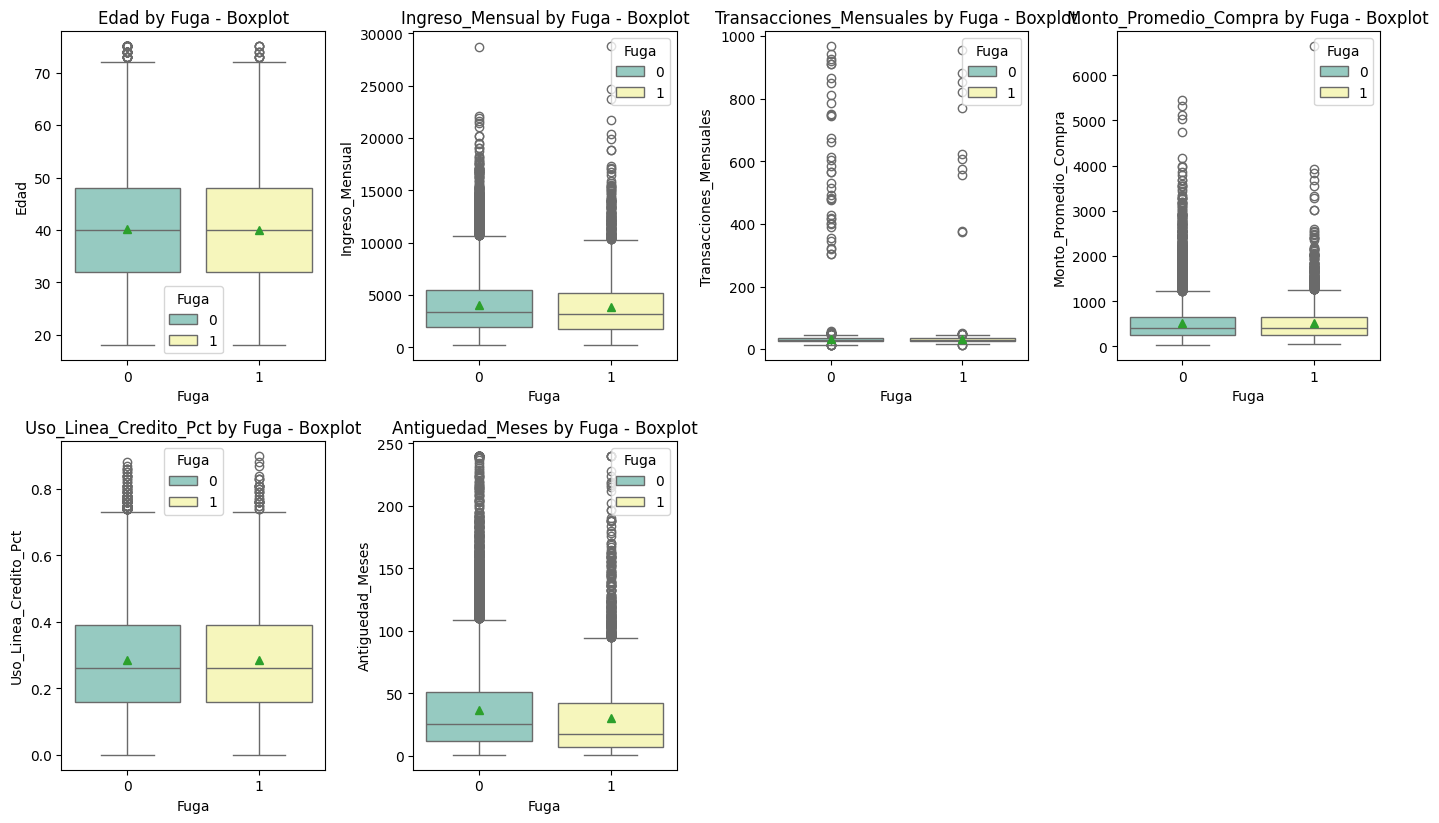

In [22]:
plot_numeric_distributions_by_target(data, 'Fuga', numeric_cols)

Las diferencias entre los grupos son en su mayoría leves, pero destacan menor antigüedad e ingreso en los clientes fugados.

No se aprecian variables numéricas con separación visual fuerte, aunque Antigüedad y Monto Promedio de Compra muestran tendencias útiles para análisis predictivo.

En conjunto, las variables cuantitativas aportan información parcial; su poder explicativo puede mejorar combinándolas con variables categóricas.

In [23]:
from scipy.stats import mannwhitneyu
import numpy as np

def mann_whitney_analysis(data, numeric_cols, target_col, alpha=0.05):
    """
    Performs Mann-Whitney U test for numeric variables vs binary target.
    Calculates effect size using r of Rosenthal.

    Parameters:
    -----------
    data : DataFrame
        The dataset containing numeric and target variables
    numeric_cols : list
        List of numeric column names to test
    target_col : str
        Name of the binary target variable
    alpha : float
        Significance level (default 0.05)

    Returns:
    --------
    DataFrame with test results and effect sizes
    """
    results = []

    # Get unique values of target variable
    target_values = data[target_col].unique()
    if len(target_values) != 2:
        raise ValueError(f"Target variable must be binary. Found {len(target_values)} unique values.")

    group1_label, group2_label = target_values[0], target_values[1]

    for variable in numeric_cols:
        # Separate groups by target variable
        group1 = data[data[target_col] == group1_label][variable].dropna()
        group2 = data[data[target_col] == group2_label][variable].dropna()

        # Check if both groups have data
        if len(group1) == 0 or len(group2) == 0:
            print(f"⚠️  Variable {variable}: No hay datos suficientes")
            continue

        # Perform Mann-Whitney U test
        statistic, p_value = mannwhitneyu(group1, group2, alternative='two-sided')

        # Calculate effect size (r of Rosenthal)
        n1, n2 = len(group1), len(group2)
        n_total = n1 + n2

        # Calculate z-score approximation for effect size
        # For large samples, U approaches normal distribution
        mean_u = n1 * n2 / 2
        std_u = np.sqrt(n1 * n2 * (n1 + n2 + 1) / 12)
        z_score = abs(statistic - mean_u) / std_u

        # r of Rosenthal = z / sqrt(n)
        r_rosenthal = z_score / np.sqrt(n_total)

        # Interpret effect size
        if r_rosenthal < 0.1:
            effect_size = "Muy pequeño"
        elif r_rosenthal < 0.3:
            effect_size = "Pequeño"
        elif r_rosenthal < 0.5:
            effect_size = "Mediano"
        else:
            effect_size = "Grande"

        # Determine significance
        is_significant = p_value < alpha

        # Calculate descriptive statistics
        median_group1 = group1.median()
        median_group2 = group2.median()
        mean_group1 = group1.mean()
        mean_group2 = group2.mean()

        # Store results
        result = {
            'Variable': variable,
            'U_Statistic': statistic,
            'p_value': p_value,
            'r_Rosenthal': r_rosenthal,
            'Effect_Size': effect_size,
            'Significant': 'Sí' if is_significant else 'No',
            f'Median_{group1_label}': median_group1,
            f'Median_{group2_label}': median_group2,
            f'Mean_{group1_label}': mean_group1,
            f'Mean_{group2_label}': mean_group2,
            f'n_{group1_label}': n1,
            f'n_{group2_label}': n2
        }
        results.append(result)

        # Print detailed results
        print(f"Variable: {variable}")
        print(f"   Mann-Whitney U = {statistic:.2f}")
        print(f"   p-valor = {p_value:.6f}")
        print(f"   r de Rosenthal = {r_rosenthal:.4f} ({effect_size})")
        print(f"   Significativo: {'Sí' if is_significant else 'No'}")
        print(f"   Medianas: {group1_label} = {median_group1:.2f}, {group2_label} = {median_group2:.2f}")
        print(f"   Medias: {group1_label} = {mean_group1:.2f}, {group2_label} = {mean_group2:.2f}")
        print(f"   Tamaños de muestra: {group1_label} = {n1}, {group2_label} = {n2}")

        # Interpretation
        if is_significant:
            if median_group2 > median_group1:
                direction = f"{group2_label} tiende a tener valores MÁS ALTOS"
            else:
                direction = f"{group1_label} tiende a tener valores MÁS ALTOS"
            print(f"Interpretación: {direction}")
        else:
            print(f"Interpretación: No hay diferencia significativa entre grupos")

        print("-" * 60)

    # Create results DataFrame
    results_df = pd.DataFrame(results)
    results_df = results_df.sort_values('r_Rosenthal', ascending=False)

    return results_df

In [24]:
# Execute Mann-Whitney analysis for numeric variables vs Churn
numeric_columns = numeric_cols.tolist()
mann_whitney_results = mann_whitney_analysis(data, numeric_columns, 'Fuga')

print("\nRESUMEN DE RESULTADOS:")
print("=" * 60)
display(mann_whitney_results[['Variable', 'U_Statistic', 'p_value', 'r_Rosenthal',
                             'Effect_Size', 'Significant']].round(4))

Variable: Edad
   Mann-Whitney U = 26844713.00
   p-valor = 0.170609
   r de Rosenthal = 0.0099 (Muy pequeño)
   Significativo: No
   Medianas: 1 = 40.00, 0 = 40.00
   Medias: 1 = 39.94, 0 = 40.22
   Tamaños de muestra: 1 = 3516, 0 = 15499
Interpretación: No hay diferencia significativa entre grupos
------------------------------------------------------------
Variable: Ingreso_Mensual
   Mann-Whitney U = 26093995.00
   p-valor = 0.000087
   r de Rosenthal = 0.0285 (Muy pequeño)
   Significativo: Sí
   Medianas: 1 = 3221.00, 0 = 3391.00
   Medias: 1 = 3906.93, 0 = 4036.37
   Tamaños de muestra: 1 = 3516, 0 = 15499
Interpretación: 0 tiende a tener valores MÁS ALTOS
------------------------------------------------------------
Variable: Transacciones_Mensuales
   Mann-Whitney U = 27220438.50
   p-valor = 0.927215
   r de Rosenthal = 0.0007 (Muy pequeño)
   Significativo: No
   Medianas: 1 = 30.00, 0 = 30.00
   Medias: 1 = 32.02, 0 = 31.43
   Tamaños de muestra: 1 = 3516, 0 = 15499
Interpre

,Variable,U_Statistic,p_value,r_Rosenthal,Effect_Size,Significant
5,Antiguedad_Meses,23197274.5,0.0000,0.0999,Muy pequeño,Sí
1,Ingreso_Mensual,26093995.0,0.0001,0.0285,Muy pequeño,Sí
3,Monto_Promedio_Compra,27710666.0,0.1148,0.0114,Muy pequeño,No
0,Edad,26844713.0,0.1706,0.0099,Muy pequeño,No
4,Uso_Linea_Credito_Pct,27326999.5,0.7860,0.0020,Muy pequeño,No
2,Transacciones_Mensuales,27220438.5,0.9272,0.0007,Muy pequeño,No


Las variables Antigüedad_Meses y Ingreso_Mensual muestran diferencias estadísticamente significativas entre clientes que se fugan y los que permanecen (p < 0.05).

Aunque las diferencias son muy pequeñas en magnitud (r < 0.1), sugieren que los clientes más nuevos y de menor ingreso son más propensos a fugarse.

Las demás variables (Edad, Monto_Promedio_Compra, Uso_Linea_Credito_Pct, Transacciones_Mensuales) no presentan diferencias significativas entre ambos grupos, lo que indica que no influyen directamente en la fuga.

# Entrenamiento

## Entrenamiento Data Cruda 

In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, classification_report

# --- Use the existing DataFrame ---
df = data.copy() # Use the existing 'data' DataFrame

# --- Codificar variables categóricas ---
df_encoded = pd.get_dummies(df, drop_first=True)

# --- Separar variables independientes (X) y dependiente (y) ---
X = df_encoded.drop('Fuga', axis=1)
y = df_encoded['Fuga']


# --- Dividir en entrenamiento y prueba ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# --- Crear y entrenar modelo ---
model = LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced')
model.fit(X_train, y_train)

# --- Predicción y evaluación ---
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.49198001577701816
              precision    recall  f1-score   support

           0       0.85      0.46      0.60      3100
           1       0.21      0.63      0.31       703

    accuracy                           0.49      3803
   macro avg       0.53      0.55      0.46      3803
weighted avg       0.73      0.49      0.54      3803



/Users/kanyewest/Documents/DataMiningTools/data-mining-tools-activities/venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
